https://www.kaggle.com/neuromusic/avocado-prices

https://www.kaggle.com/abdulmeral/avocado-all-in-one

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
#
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
#
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
#
from sklearn.linear_model import Lasso 
from sklearn.linear_model import ElasticNet 
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.svm import SVR 
#
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.ensemble import ExtraTreesRegressor 
from sklearn.ensemble import AdaBoostRegressor 
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import ExtraTreesClassifier
import warnings
warnings.filterwarnings("ignore")

# 데이터 import

- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold
- 4046 - Total number of avocados with PLU 4046 sold
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold

In [14]:
import pandas as pd

data = pd.read_csv('avocado.csv')
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [16]:
data.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [27]:
data

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [26]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65
year,18249.0,2016.147899,9.399385e-01,2015.00,2015.00,2016.00,2017.00,2018.00


In [22]:
data


,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


# EDA

In [32]:
data.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [31]:
data.type.unique()
data.type.value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [33]:
data.year.value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

In [34]:
data.region.value_counts()

California             338
HarrisburgScranton     338
Seattle                338
Chicago                338
Nashville              338
CincinnatiDayton       338
Jacksonville           338
Sacramento             338
Tampa                  338
Orlando                338
Plains                 338
LosAngeles             338
Charlotte              338
Pittsburgh             338
Detroit                338
Houston                338
SanFrancisco           338
PhoenixTucson          338
RichmondNorfolk        338
NorthernNewEngland     338
TotalUS                338
SouthCentral           338
Philadelphia           338
Boise                  338
Spokane                338
Boston                 338
GreatLakes             338
Atlanta                338
BuffaloRochester       338
Southeast              338
Roanoke                338
Indianapolis           338
Albany                 338
Columbus               338
HartfordSpringfield    338
Portland               338
Midsouth               338
G

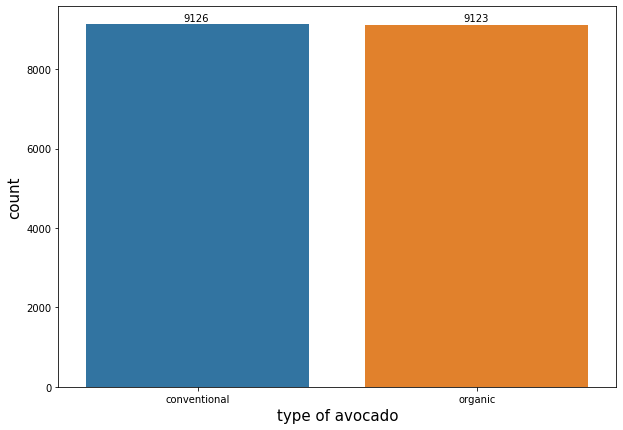

In [52]:
f,ax = plt.subplots(figsize =(10,7))
ax = sns.countplot(x=data.type,label='count')
plt.xlabel('type of avocado',fontsize=15)
plt.ylabel('count',fontsize=15)


# 바 위에 숫자 뜨게 !
for p in ax.patches:
        ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.35, p.get_height()+75))

Text(0, 0.5, 'average price')

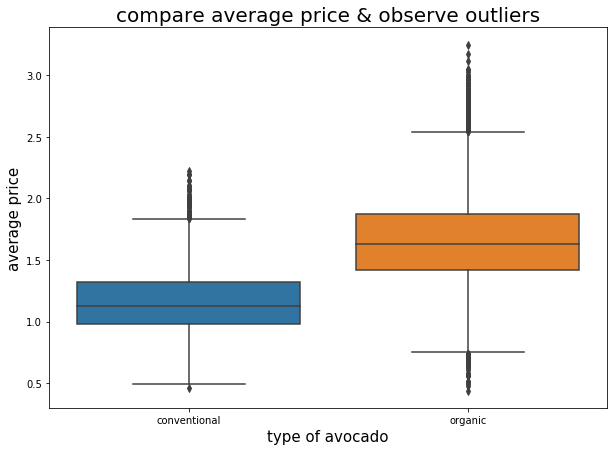

In [53]:
f,ax = plt.subplots(figsize=(10,7))
sns.boxplot(x='type',y='AveragePrice',data =data)
plt.title('compare average price & observe outliers',fontsize=20)
plt.xlabel('type of avocado',fontsize=15)
plt.ylabel('average price',fontsize=15)

Text(0, 0.5, 'average price')

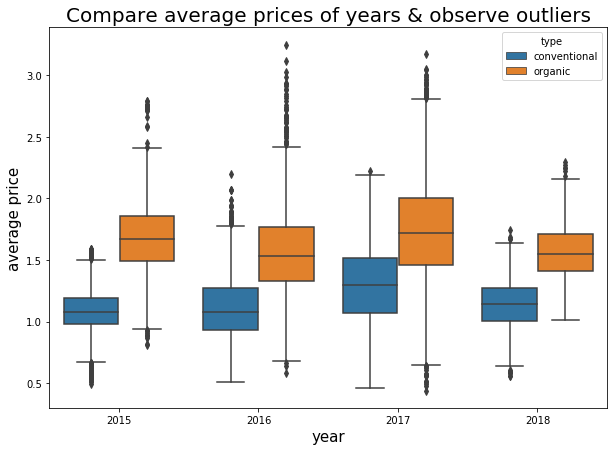

In [54]:
f, ax = plt.subplots(figsize=(10,7))
sns.boxplot(x='year',y='AveragePrice',hue='type',data=data)
plt.title('Compare average prices of years & observe outliers',fontsize =20)
plt.xlabel('year',fontsize=15)
plt.ylabel('average price',fontsize=15)

# 17년도 가격이 가장 높다
#16년도의 오가닉 이상치 많음


Text(0, 0.5, 'average price')

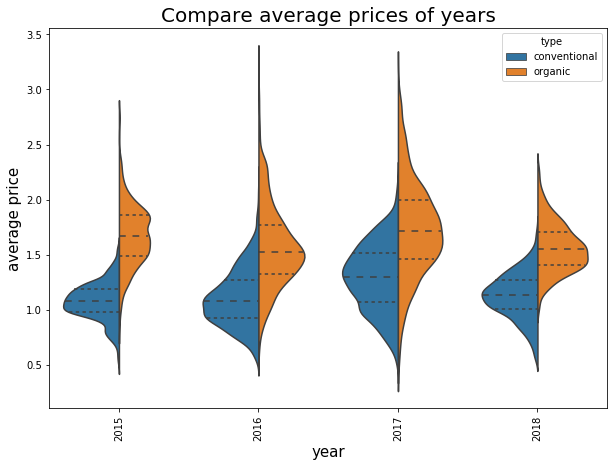

In [55]:
f,ax = plt.subplots(figsize=(10,7))
sns.violinplot(x='year',y='AveragePrice',hue='type',data=data,split=True,inner='quart')
plt.xticks(rotation=90)
plt.title('Compare average prices of years',fontsize=20)
plt.xlabel('year',fontsize=15)
plt.ylabel('average price',fontsize=15)

Text(0, 0.5, 'Average prce')

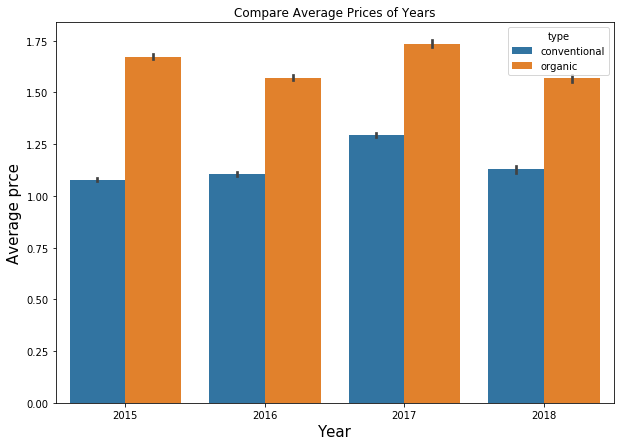

In [57]:
f,ax = plt.subplots(figsize=(10,7))
sns.barplot(x='year',y='AveragePrice',hue='type',data=data)
plt.title('Compare Average Prices of Years')
plt.xlabel('Year',fontsize=15)
plt.ylabel('Average prce',fontsize=15)

#오가닉의 평균가격이 전체적으로 월등히 높다
# 17년도에 가격 상승폭이 보임

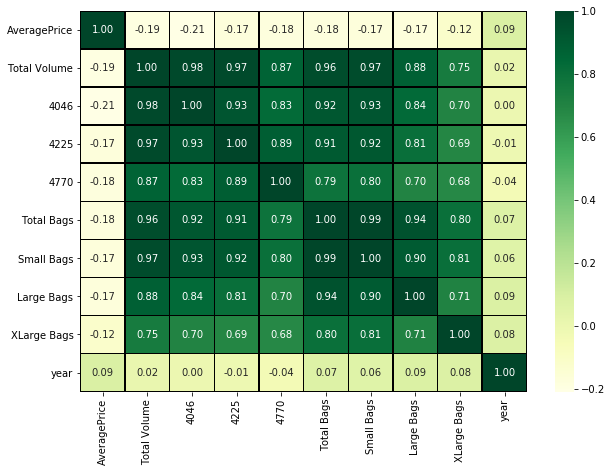

In [64]:
f,ax = plt.subplots(figsize=(10,7))
sns.heatmap(data.corr(),annot=True,cmap='YlGn',linewidths=0.5,linecolor='black',fmt='.2f',ax=ax)

#fmt 주석의  string format하는 것


In [65]:
data_con = data[data['type'] == 'conventional']
data_org = data[data['type'] == 'organic']

In [66]:
data_con

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9121,2018-02-04,0.76,1272039.80,531469.08,368948.26,13078.20,358544.26,127833.03,229786.03,925.20,conventional,2018,WestTexNewMexico
9122,2018-01-28,0.85,957086.16,479147.93,179489.19,7314.98,291134.06,143430.96,147376.43,326.67,conventional,2018,WestTexNewMexico
9123,2018-01-21,0.84,1020913.20,505263.29,177911.40,9468.95,328269.56,118978.50,209131.06,160.00,conventional,2018,WestTexNewMexico
9124,2018-01-14,0.90,950954.60,463945.73,188126.02,11227.47,287655.38,125408.69,162040.02,206.67,conventional,2018,WestTexNewMexico


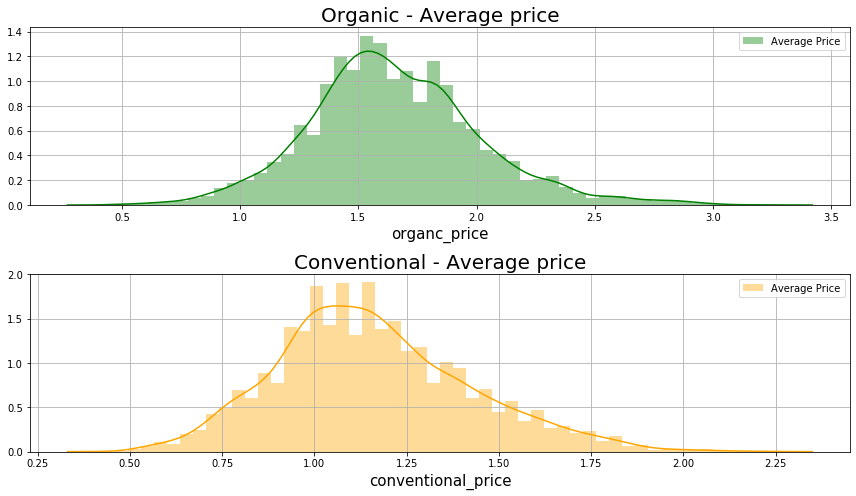

In [86]:
f,ax = plt.subplots(figsize=(12,7))
plt.subplot(2,1,1)
sns.distplot(data_org.AveragePrice,color='green',label='Average Price')
plt.title('Organic - Average price',fontsize= 20)
plt.xlabel('organc_price',fontsize=15)
plt.legend()
plt.grid()

plt.subplot(2,1,2)
sns.distplot(data_con.AveragePrice,color='orange',label='Average Price')
plt.title('Conventional - Average price',fontsize=20)
plt.xlabel('conventional_price',fontsize=15)
plt.tight_layout()  #두 그래프 겹치지않게 
plt.legend()
plt.grid()

# 오가닉이 더 높다 

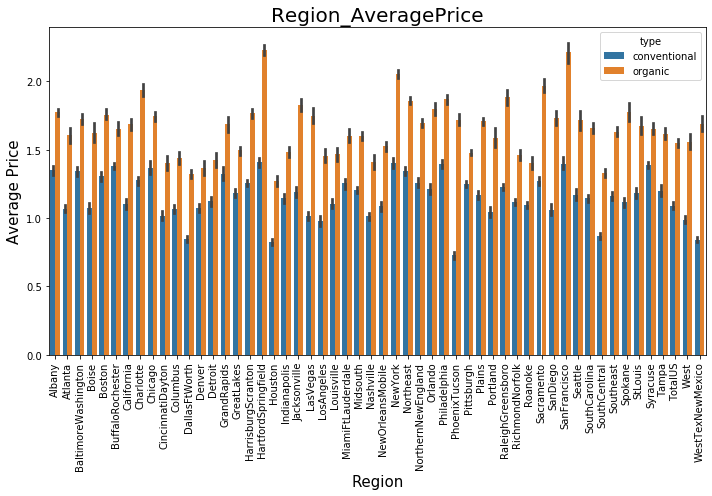

In [91]:
f,ax = plt.subplots(figsize=(10,7))
sns.barplot(x='region',y='AveragePrice',hue='type',data=data)
plt.title("Region_AveragePrice",fontsize=20)
plt.xlabel('Region',fontsize=15)
plt.ylabel("Average Price",fontsize=15)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [97]:
data_region

0                  Albany
1                  Albany
2                  Albany
3                  Albany
4                  Albany
               ...       
18244    WestTexNewMexico
18245    WestTexNewMexico
18246    WestTexNewMexico
18247    WestTexNewMexico
18248    WestTexNewMexico
Name: region, Length: 18249, dtype: object

(-0.5, 511.5, 383.5, -0.5)

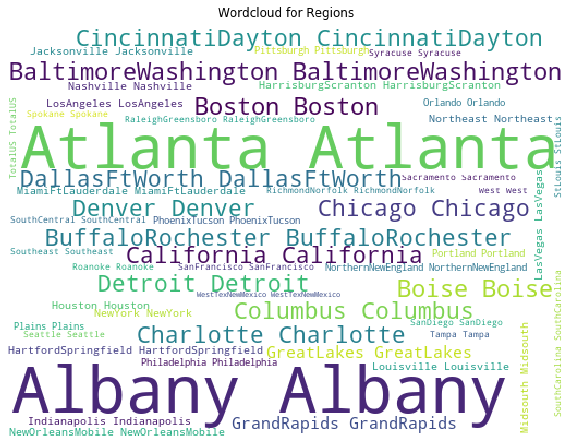

In [96]:
from wordcloud import WordCloud

data_region = data.region
plt.subplots(figsize=(10,10))
wordcloud = WordCloud(background_color ='white',width=512,height=384).generate('*'.join(data_region))
plt.imshow(wordcloud)
plt.title("Wordcloud for Regions")
plt.axis('off')

#수확이 많이되는 지역들을 볼 수 있다.
# 아틀란타, 알바니 

# 여기서부터

## per year consumtion

In [100]:
# Sum(ounce) of Avocados for per year
data_2015 = data[data['year']==2015]
sum_2015 = data_2015['Total Volume'].sum()
data_2016 = data[data.year==2016]
sum_2016 = data_2016["Total Volume"].sum()
data_2017 = data[data.year==2017]
sum_2017 = data_2017["Total Volume"].sum()
data_2018 = data[data.year==2018]
sum_2018 = data_2018["Total Volume"].sum()

# Sum(ounce) of Avocados for per year in conventional
data_con_2015 = data_con[data_con['year']==2015]
sum_con_2015 = data_con_2015['Total Volume'].sum()
data_con_2016 = data_con[data.year==2016]
sum_con_2016 = data_con_2016["Total Volume"].sum()
data_con_2017 = data_con[data.year==2017]
sum_con_2017 = data_con_2017["Total Volume"].sum()
data_con_2018 = data_con[data.year==2018]
sum_con_2018 = data_con_2018["Total Volume"].sum()

#sum of avocados for per year in organic

data_org_2015 = data_org[data.year==2015]
sum_org_2105 = data_org['Total Volume'].sum()
data_org_2016 = data_org[data_org.]

In [104]:
data_2015

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11928,2015-02-01,1.77,7210.19,1634.42,3012.44,0.00,2563.33,2563.33,0.00,0.0,organic,2015,WestTexNewMexico
11929,2015-01-25,1.63,7324.06,1934.46,3032.72,0.00,2356.88,2320.00,36.88,0.0,organic,2015,WestTexNewMexico
11930,2015-01-18,1.71,5508.20,1793.64,2078.72,0.00,1635.84,1620.00,15.84,0.0,organic,2015,WestTexNewMexico
11931,2015-01-11,1.69,6861.73,1822.28,2377.54,0.00,2661.91,2656.66,5.25,0.0,organic,2015,WestTexNewMexico


# prediction_ modeling